<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/Career_HousePrice_LR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#ApartmentTrading data

In [4]:
#Đọc dữ liệu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,75.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,6300.0,84.000000,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
1,115.0,Đông Nam,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,10250.0,89.130435,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
2,100.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,2600.0,26.000000,NaN,NaN,5e958ee8208d0d6d7648f9da,Phố Thành Công Bắc,NaN,NaN,5e5501cbeb80a7245175e0ee,Phường Thành Công
3,30.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,2.0,NaN,NaN,...,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,3.0,NaN,NaN,...,1750.0,24.305556,NaN,NaN,5e958ee8208d0d6d7648f9bf,Phố Đặng Dung,NaN,NaN,5e5501cbeb80a7245175e0e7,Phường Quán Thánh


In [5]:
#Đọc thông tin dữ liệu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

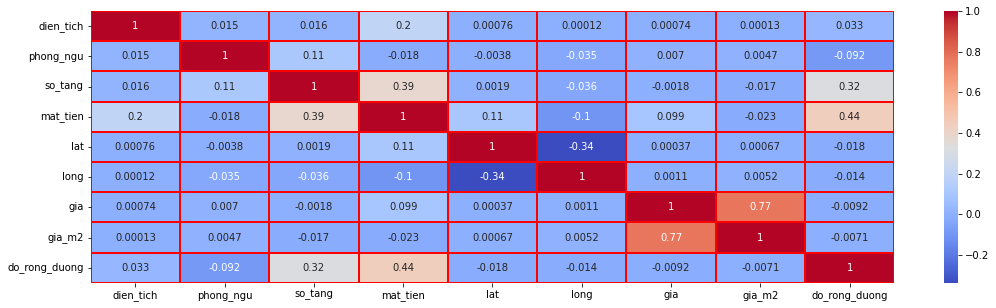

In [6]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [7]:
#Đổi các giá trị nan thành giá trị có thể cho máy học
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã chuyển đổi",df[ten_cot].isna().sum(),"giá trị nan thành:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã xóa giá trị nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

In [8]:
replaceNAN(at_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 21087 giá trị nan thành: không


In [9]:
for i in at_data['so_do'].unique():
  if i != "không":
    at_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")

Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Pháp lý rõ ràng, sở hữu 50 năm rồi CĐT gia hạn tiếp cho khách hàng  Thành công
Chuyển  Đã có sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sở hữu 50 năm, pháp lý rõ ràng.  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Đã có sổ đỏ chính chủ.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Căn hộ đã có sổ dfor.  Thành công
Chuyển  Sổ đỏ đẹp như hoa hậu, chờ giao dịch.  Thành công
Chuyển  Sổ đỏ sở hữu lâu dài vĩnh viễn.  Thành công
Chuyển  Sổ đỏ sở hữu 50 năm.  Thành công
Chuyển  Sở hữu vĩnh viễn, pháp lý rõ ràng  Thành công
Chuyển  Sở hữu 50 năm pháp lý rõ ràng, xong CĐT gia hạn sử dụng tiếp  Thành công
Chuyển  Sở hữu lâu dài, pháp lý hoàn thiện rõ ràng  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  sổ đỏ  Thành công
Chuyển  Sổ hồng, pháp lý rõ ràng  Thành công
Chuyển  Sổ đỏ c

In [10]:
at_data["so_do"].unique()

array(['có', 'không'], dtype=object)

In [11]:
#Dữ liệu để dự đoán giá nhà
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]

In [12]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
#Kiểm tra tổng giá trị nan có trong dữ liệu
at_data_new.isna().sum()

dien_tich      476
phong_ngu     7901
so_tang      29787
so_do            0
lat             36
long            36
gia              0
dtype: int64

In [14]:
removeNAN(at_data_new, 'dien_tich')
removeNAN(at_data_new, 'lat')
removeNAN(at_data_new, 'long')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 7670 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 29282 giá trị nan thành: 1


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",at_data_new.shape[0],"dòng")

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hiện có: 31624 dòng


In [16]:
#Dùng IQR để xử lý ngoại lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

In [17]:
at_data_new.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'so_do', 'lat', 'long', 'gia'], dtype='object')

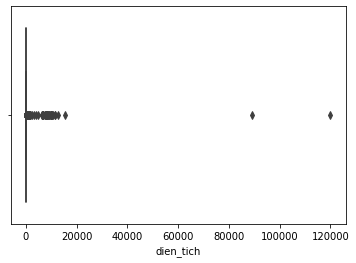

In [18]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


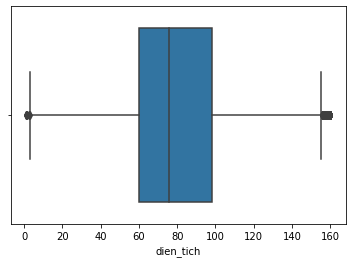

In [19]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

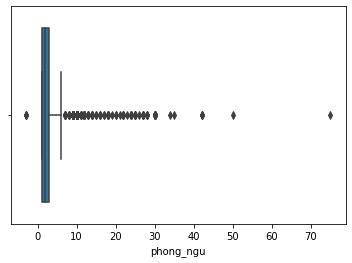

In [20]:
sns.boxplot(x=at_data_new['phong_ngu'])

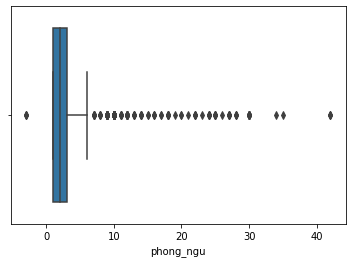

In [21]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

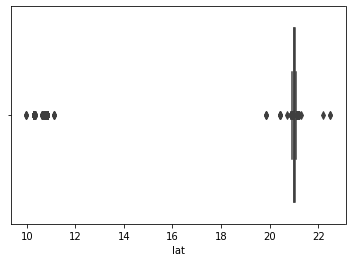

In [22]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['lat']) 

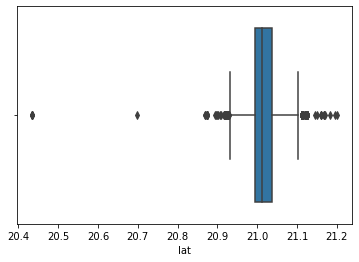

In [23]:
at_data_new = at_data_new[at_data_new['lat'] <21.2]
at_data_new = at_data_new[at_data_new['lat'] >20]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['lat']) 

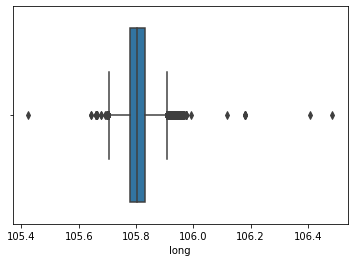

In [24]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['long'])

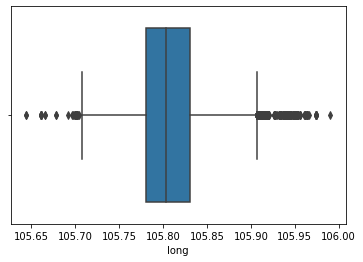

In [25]:
at_data_new = at_data_new[at_data_new['long'] >105.6]
at_data_new = at_data_new[at_data_new['long'] <106]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['long'])

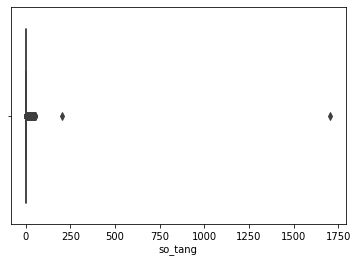

In [26]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['so_tang'])

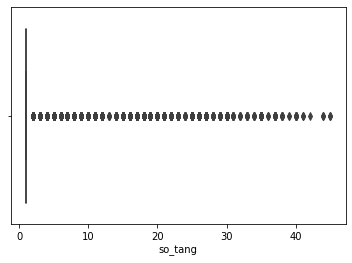

In [27]:
at_data_new = at_data_new[at_data_new['so_tang'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [28]:
at_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,75.0,2.0,1.0,có,21.031035,105.815152,6300.000
1,115.0,3.0,1.0,có,21.031130,105.814818,10250.000
2,100.0,2.0,1.0,có,21.020889,105.815820,2600.000
3,30.0,2.0,2.0,có,21.028785,105.821409,3500.000
4,72.0,2.0,3.0,có,21.043654,105.841574,1750.000
...,...,...,...,...,...,...,...
30352,35.0,1.0,1.0,không,21.071830,105.797201,550.000
30353,122.0,4.0,1.0,không,21.040789,105.765044,11.000
30354,72.0,2.0,1.0,không,21.047770,105.792404,9.000
30355,54.0,2.0,1.0,không,21.168425,105.741163,432.000


In [29]:
at_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#LandTrading data

In [30]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27249,72.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,670.0,9.305556,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2e5,Xã Hoàng Long
27250,90.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,800.0,8.888889,NaN,NaN,5e958eef208d0d6d76490f18,Đường Quốc lộ 1A,NaN,NaN,5e5501cceb80a7245175e2e4,Xã Hồng Thái
27251,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,5e958eef208d0d6d76490f1c,Đường Tỉnh lộ 428,NaN,NaN,5e5501cceb80a7245175e2ed,Xã Phúc Tiến
27252,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2db,Thị trấn Phú Xuyên


In [31]:
replaceNAN(lt_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 12566 giá trị nan thành: không


In [32]:
for i in lt_data['so_do'].unique():
  if i != "không":
    lt_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
lt_data["so_do"].unique()

Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  Đã có sổ đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, nở hậu, sẵn sàng giao dịch.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ chính chủ vuông đẹp  Thành công
Chuyển  Hồ sơ pháp lý đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý sạch đẹp.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý chuẩn.  Thành công
Chuyển  Hồ sơ văn tự  Thành công
Chuyển  Sổ đỏ sẵn sàng  Thành công
Chuyển  Sổ đỏ, pháp lý đầy đủ, minh bạch.  Thành công
Chuyển  Sổ đỏ đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ sẵn sàng giao dịch.  Thành công
Chuyển  Đã có sổ đỏ, vuông vắn, nở hậu  Thành công
Chuyển  Sổ đỏ vuông vắn chính chủ, pháp lý rõ ràng, quy hoạch ổn định.  Thành 

array(['có', 'không'], dtype=object)

In [33]:
#Dữ liệu để dự đoán giá nhà
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]

In [34]:
lt_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,220.0,1.0,1.0,có,21.035456,105.810210,30000.0
1,500.0,NaN,NaN,có,21.030160,105.839556,195000.0
2,154.0,1.0,1.0,có,21.034405,105.831625,40000.0
3,116.0,NaN,NaN,có,21.032373,105.809571,14300.0
4,195.0,1.0,1.0,có,21.029599,105.827306,26500.0
...,...,...,...,...,...,...,...
27249,72.0,NaN,NaN,có,20.775086,105.826094,670.0
27250,90.0,NaN,NaN,có,20.758092,105.912060,800.0
27251,100.0,NaN,NaN,không,20.704557,105.845669,NaN
27252,100.0,NaN,NaN,có,20.716869,105.890686,NaN


In [35]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [36]:
removeNAN(lt_data_new, 'dien_tich')
removeNAN(lt_data_new, 'lat')
removeNAN(lt_data_new, 'long')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",lt_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 21796 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 21591 giá trị nan thành: 1
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hiện có: 22841 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


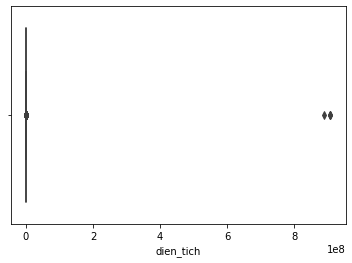

In [37]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


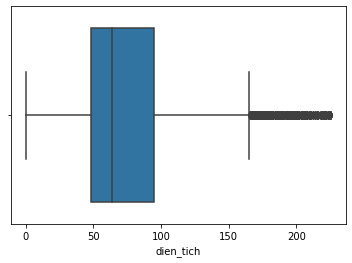

In [38]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

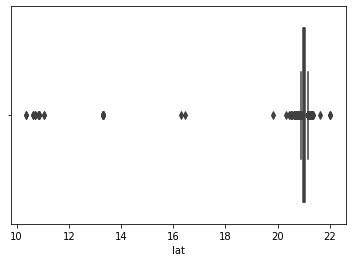

In [39]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['lat'])

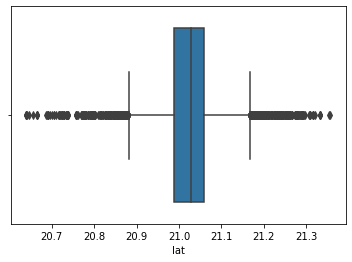

In [40]:
lt_data_new = lt_data_new[lt_data_new['lat'] >20.6]
lt_data_new = lt_data_new[lt_data_new['lat'] <21.5]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['lat'])

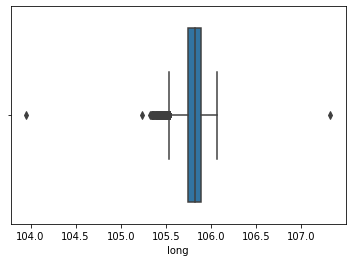

In [41]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['long'])

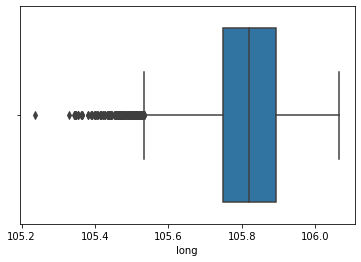

In [42]:
lt_data_new = lt_data_new[lt_data_new['long'] >105.2]
lt_data_new = lt_data_new[lt_data_new['long'] <107]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['long'])

In [43]:
lt_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,220.0,1.0,1.0,có,21.035456,105.810210,30000.00
1,154.0,1.0,1.0,có,21.034405,105.831625,40000.00
2,116.0,1.0,1.0,có,21.032373,105.809571,14300.00
3,195.0,1.0,1.0,có,21.029599,105.827306,26500.00
4,100.0,5.0,1.0,có,21.031460,105.822657,5400.00
...,...,...,...,...,...,...,...
19763,72.0,1.0,1.0,có,20.838600,105.808333,600.00
19764,120.0,1.0,1.0,có,20.768980,105.806281,554.48
19765,72.0,1.0,1.0,có,20.775086,105.826094,670.00
19766,90.0,1.0,1.0,có,20.758092,105.912060,800.00


In [44]:
lt_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#RoadSurfaceHouseTrading data

In [45]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,42.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,NaN,NaN,3.0,NaN,NaN,...,2250.0,53.571429,NaN,NaN,NaN,NaN,3.0,Mặt phố - Mặt đường,5e5501cbeb80a7245175e1ae,Phường Tây Mỗ
1,220.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,61000.0,277.272727,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,NaN,NaN
2,69.0,Đông-Nam,9.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,7.0,8.3,"Nhà xây kiên cố, sơn nhà trắng Kova mới sơn lạ...",...,21000.0,304.347826,NaN,NaN,5e958ee8208d0d6d7648f98f,Đường Nguyễn Công Hoan,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
3,50.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,NaN,NaN,...,25000.0,500.000000,NaN,NaN,5e958ee8208d0d6d7648f9ac,Đường Trần Phú,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0ec,Phường Kim Mã
4,72.0,NaN,5.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,6.0,NaN,...,12000.0,166.666667,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,60.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e4,Phường Cống Vị
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62842,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4500.0,56.250000,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62843,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4950.0,61.875000,NaN,NaN,5e958eee208d0d6d76490ae8,Đường Phố Yên,10.0,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62844,105.0,NaN,6.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,NaN,5.0,Không NT,...,NaN,NaN,NaN,NaN,5e958eee208d0d6d76490ae7,Đường Ngô Miễn,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1d2,Xã Kim Hoa
62845,70.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,1.0,NaN,NaN,...,2400.0,34.285714,NaN,NaN,5e958eee208d0d6d76490aeb,Đường Quốc lộ 23,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1dd,Xã Mê Linh


In [46]:
replaceNAN(rsht_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 23273 giá trị nan thành: không


In [47]:
for i in rsht_data['so_do'].unique():
  if i != "không":
    rsht_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
rsht_data["so_do"].unique()

Chuyển  Giấy đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Đã có sổ hồng  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lí rõ ràng.  Thành công
Chuyển  Sổ đỏ đẹp nở hậu sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch.  Thành công
Chuyển  Pháp lý cực chuẩn, sổ đỏ chính chủ, nở hậu phong thuỷ quá đẹp, sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Sổ đỏ chính chủ vuông vắn nở hậu.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Pháp lý sạch, không quy hoạch  Thành công
Chuyển  Nhà có sổ đỏ chính chủ vuông vắn và riêng biệt.  Thành công
Chuyển  Sổ đỏ chính chủ, giao dịch ngay  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn.  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn 1 sổ, 1 chủ.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý

array(['có', 'không'], dtype=object)

In [48]:
#Dữ liệu để dự đoán giá nhà
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,42.0,2.0,3.0,có,21.008853,105.743919,2250.0
1,220.0,NaN,NaN,có,21.033781,105.814054,61000.0
2,69.0,9.0,7.0,có,21.027277,105.815289,21000.0
3,50.0,NaN,5.0,không,21.032735,105.830108,25000.0
4,72.0,5.0,5.0,có,21.034090,105.806928,12000.0
...,...,...,...,...,...,...,...
62842,80.0,3.0,3.0,có,21.018166,105.847905,4500.0
62843,80.0,3.0,3.0,có,21.149180,105.758726,4950.0
62844,105.0,6.0,NaN,có,21.228113,105.736179,NaN
62845,70.0,1.0,1.0,có,21.164764,105.744397,2400.0


In [49]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [50]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'lat')
removeNAN(rsht_data_new, 'long')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",rsht_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 24378 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 15074 giá trị nan thành: 1
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hiện có: 60691 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


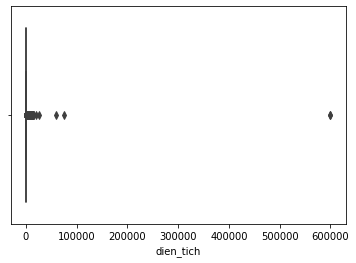

In [51]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


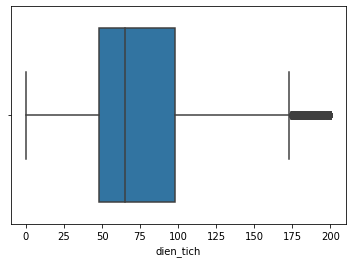

In [52]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

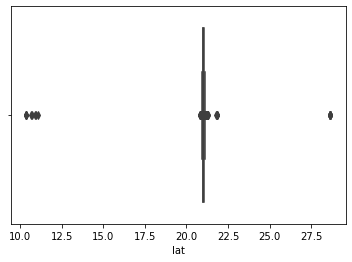

In [53]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['lat'])

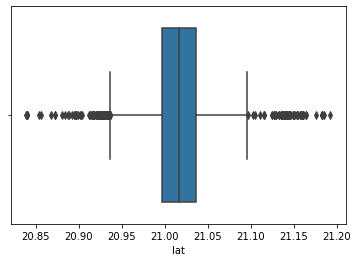

In [54]:
rsht_data_new = rsht_data_new[rsht_data_new['lat'] >17.5]
rsht_data_new = rsht_data_new[rsht_data_new['lat'] <21.2]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['lat'])

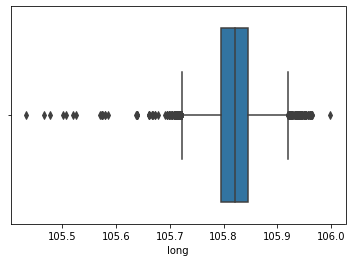

In [55]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['long'])

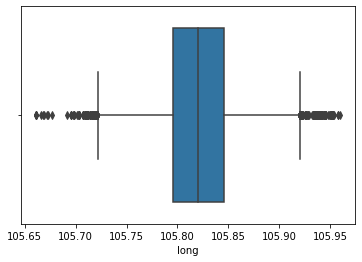

In [56]:
rsht_data_new = rsht_data_new[rsht_data_new['long'] >105.64]
rsht_data_new = rsht_data_new[rsht_data_new['long'] <105.96]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['long'])

In [57]:
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,42.0,2.0,3.0,có,21.008853,105.743919,2250.0
1,69.0,9.0,7.0,có,21.027277,105.815289,21000.0
2,50.0,1.0,5.0,không,21.032735,105.830108,25000.0
3,72.0,5.0,5.0,có,21.034090,105.806928,12000.0
4,50.0,3.0,5.0,không,20.955835,105.756366,16000.0
...,...,...,...,...,...,...,...
55358,80.0,3.0,3.0,có,21.018166,105.847905,4500.0
55359,80.0,3.0,3.0,có,21.018166,105.847905,4500.0
55360,80.0,3.0,3.0,có,21.149180,105.758726,4950.0
55361,70.0,1.0,1.0,có,21.164764,105.744397,2400.0


In [58]:
rsht_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#Tổng hợp

In [121]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])

mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,75.0,2.0,1.0,có,21.031035,105.815152,6300
1,115.0,3.0,1.0,có,21.031130,105.814818,10250
2,100.0,2.0,1.0,có,21.020889,105.815820,2600
3,30.0,2.0,2.0,có,21.028785,105.821409,3500
4,72.0,2.0,3.0,có,21.043654,105.841574,1750
...,...,...,...,...,...,...,...
103009,80.0,3.0,3.0,có,21.018166,105.847905,4500
103010,80.0,3.0,3.0,có,21.018166,105.847905,4500
103011,80.0,3.0,3.0,có,21.149180,105.758726,4950
103012,70.0,1.0,1.0,có,21.164764,105.744397,2400


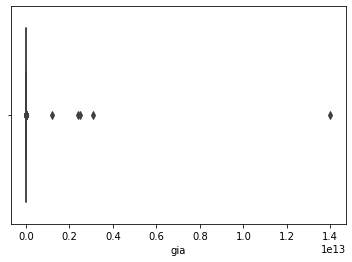

In [122]:
#Kiểm tra và xử lý dữ liệu ngoại lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

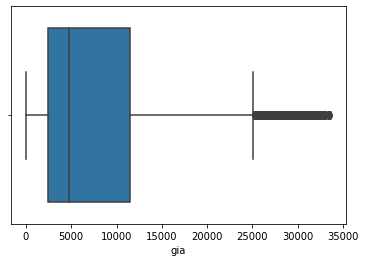

In [123]:
data = outliner_remove(data, 'gia')
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

In [124]:
dict_so_do = {
    "so_do":{
        "không":1.0,
        "có":2.0
    }}
for i in [dict_so_do]:
    data.replace(i,inplace=True)
data.so_do.unique()

array([2., 1.])

In [125]:
data

,dien_tich,phong_ngu,so_tang,so_do,lat,long,gia
0,75.0,2.0,1.0,2.0,21.031035,105.815152,6300
1,115.0,3.0,1.0,2.0,21.031130,105.814818,10250
2,100.0,2.0,1.0,2.0,21.020889,105.815820,2600
3,30.0,2.0,2.0,2.0,21.028785,105.821409,3500
4,72.0,2.0,3.0,2.0,21.043654,105.841574,1750
...,...,...,...,...,...,...,...
93645,80.0,3.0,3.0,2.0,21.018166,105.847905,4500
93646,80.0,3.0,3.0,2.0,21.018166,105.847905,4500
93647,80.0,3.0,3.0,2.0,21.149180,105.758726,4950
93648,70.0,1.0,1.0,2.0,21.164764,105.744397,2400


# Plot

In [ ]:
#Biểu đồ thể hiện giá khi so với diện tích
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "dien_tich")
plt.show()

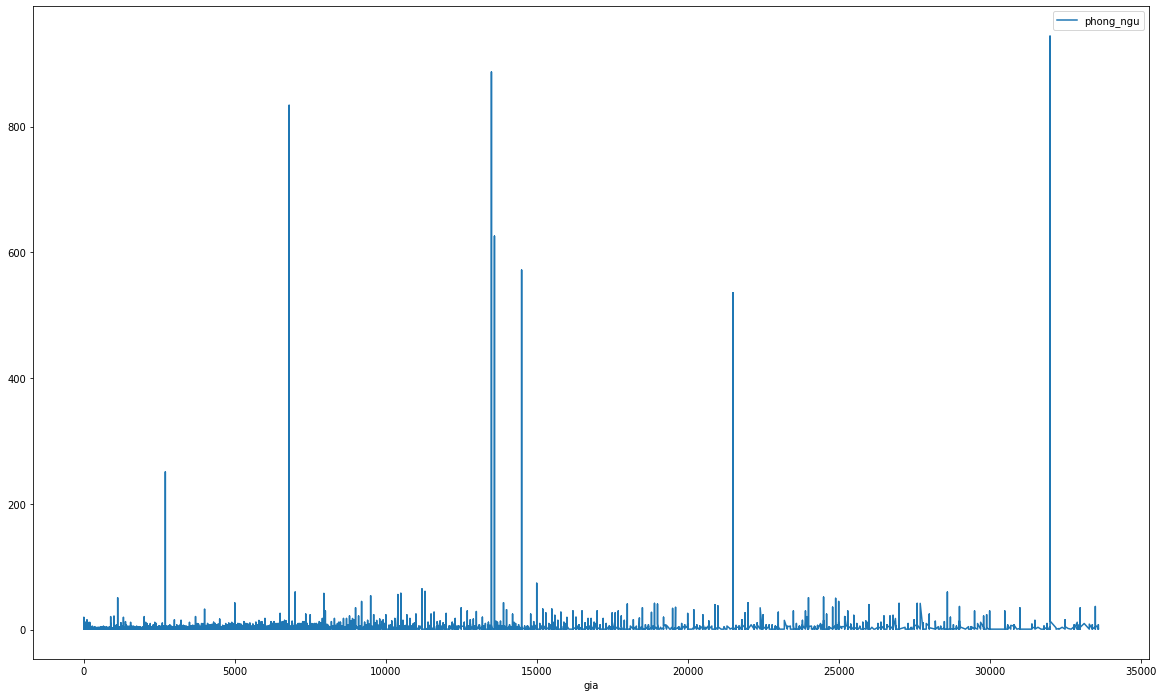

In [65]:
#Biểu đồ thể hiện giá khi so với số phòng ngủ

data = data[data['phong_ngu'] <1000]
data = data[data['phong_ngu'] >0]
data.reset_index(drop=True, inplace=True) 

plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "phong_ngu")
plt.show()

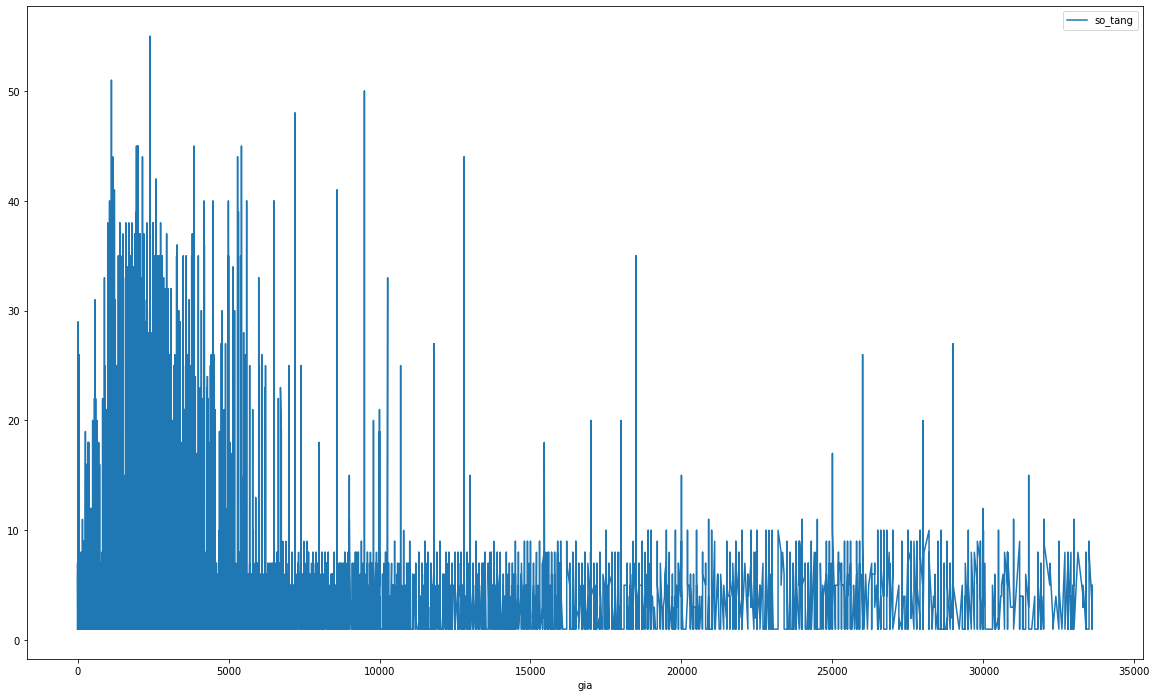

In [66]:
#Biểu đồ thể hiện giá khi so với số tầng

data = data[data['so_tang'] <100]
data = data[data['so_tang'] >0]
data.reset_index(drop=True, inplace=True)

plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "so_tang")
plt.show()

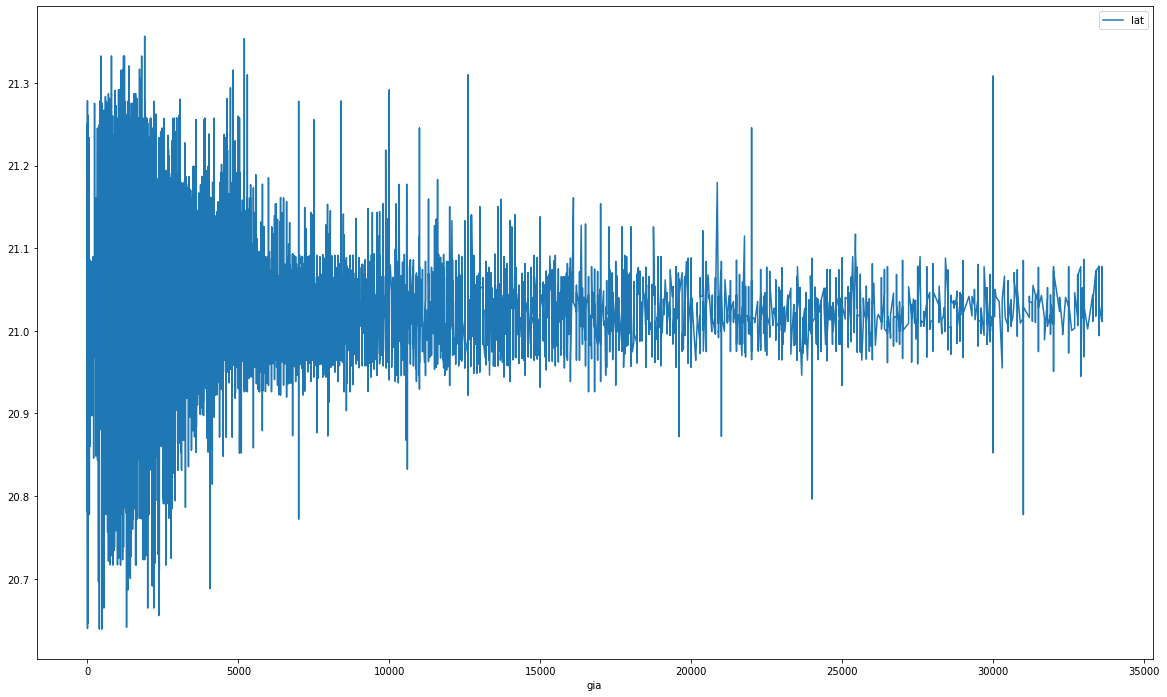

In [67]:
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "lat")
plt.show()

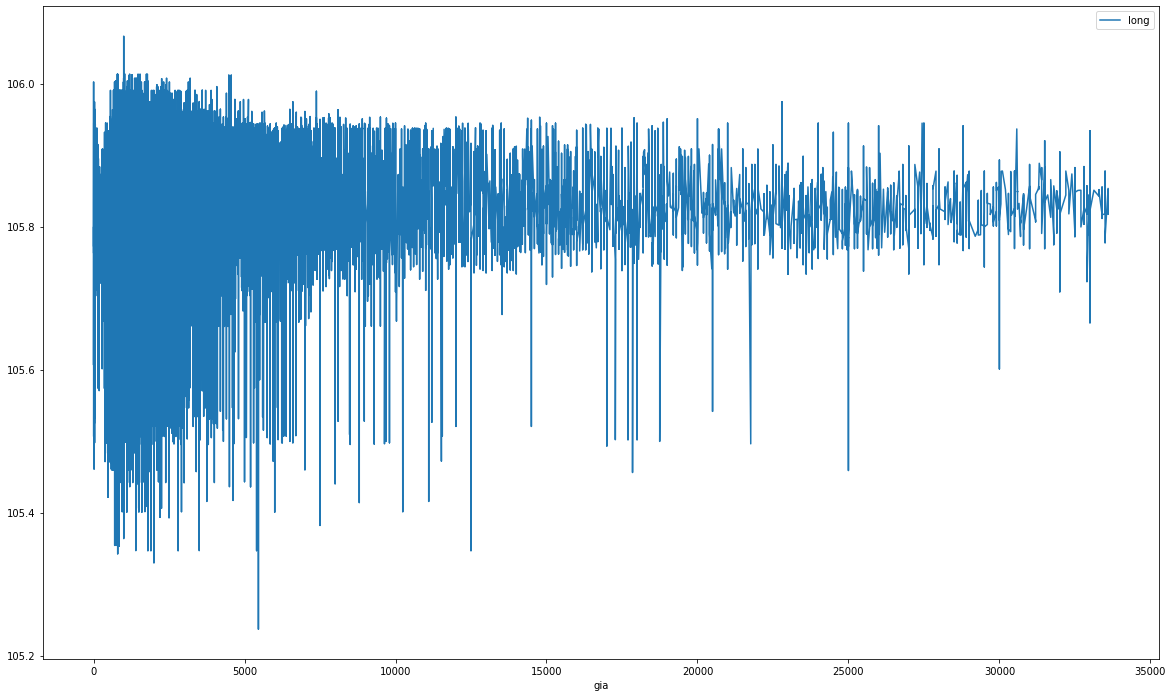

In [68]:
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "long")
plt.show()

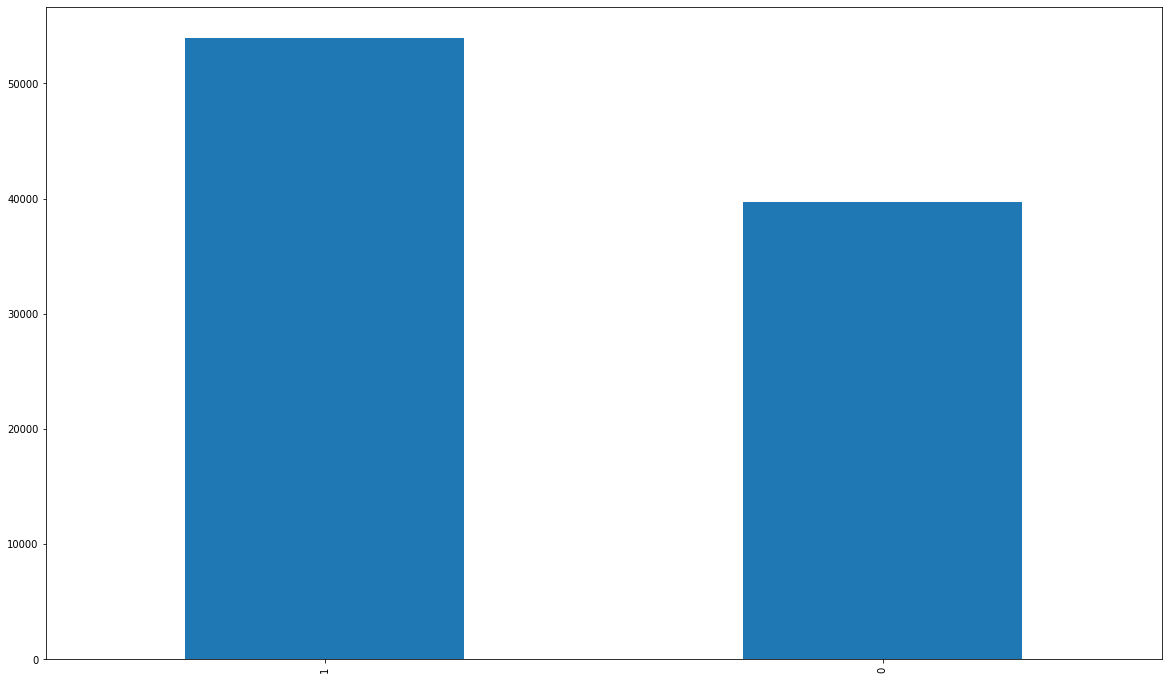

In [69]:
data.so_do.value_counts().plot.bar()

#Train with LinearRegression

In [126]:
def split(df):
  split = int(len(df) * 0.99)
  train = df[:split]
  test = df[split:]
  print(f"Dữ liệu cho train set: {len(train)}")
  print(f"Dữ liệu cho test set: {len(test)}")
  return train, test

#Lấy data để dạy máy học
train_data, test_data = split(data)

Dữ liệu cho train set: 92713
Dữ liệu cho test set: 937


In [127]:
names = ['dien_tich','phong_ngu','so_tang','so_do','lat','long']
x_train = train_data[names]
y_train = train_data['gia']
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [128]:
x_test = test_data[names]
y_test = test_data['gia']
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [129]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression().fit(x_train, y_train)

In [130]:
y_predict=Linreg.predict(x_test)
y_predict

array([ 8425.20944027, 13445.02662736,  8495.081228  ,  7868.19683322,
        7277.85209478,  6056.27952209,  8840.62380923,  7417.51450691,
        6366.25588588,  5623.15929964, 10426.74885434,  9251.35691075,
        4537.33640941,  6419.16313309,  8204.09752559, 11882.93694447,
        5476.80345498,  7189.72371259, 10220.52692221,  9506.39153302,
        9075.26215254,  6237.83757532,  6366.25588588,  7541.26314189,
        6366.25588588,  4538.12305255,  5987.56949156,  6414.40643278,
        6219.68323718,  8900.00528477, 11206.57833657,  7756.71716155,
        6998.98102533,  4737.60951616,  6076.33880509,  7851.94461267,
        6366.25588588, 11095.07557721,  4320.51780612,  5270.4395128 ,
        6011.15750591,  7479.70425525,  5786.17504244, 11095.07557721,
        6095.5466299 ,  6169.51635055, 11095.07557721,  4538.12305255,
        5526.13875766, 11003.67355832,  8613.62717564, 13304.4341099 ,
        8934.28020849,  6128.28555549, 13304.4341099 ,  4897.41979105,
      

In [131]:
y_test

0       5800
1      18500
2       7200
3       4200
4       7300
       ...  
932     4500
933     4500
934     4950
935     2400
936     4000
Name: gia, Length: 937, dtype: int64

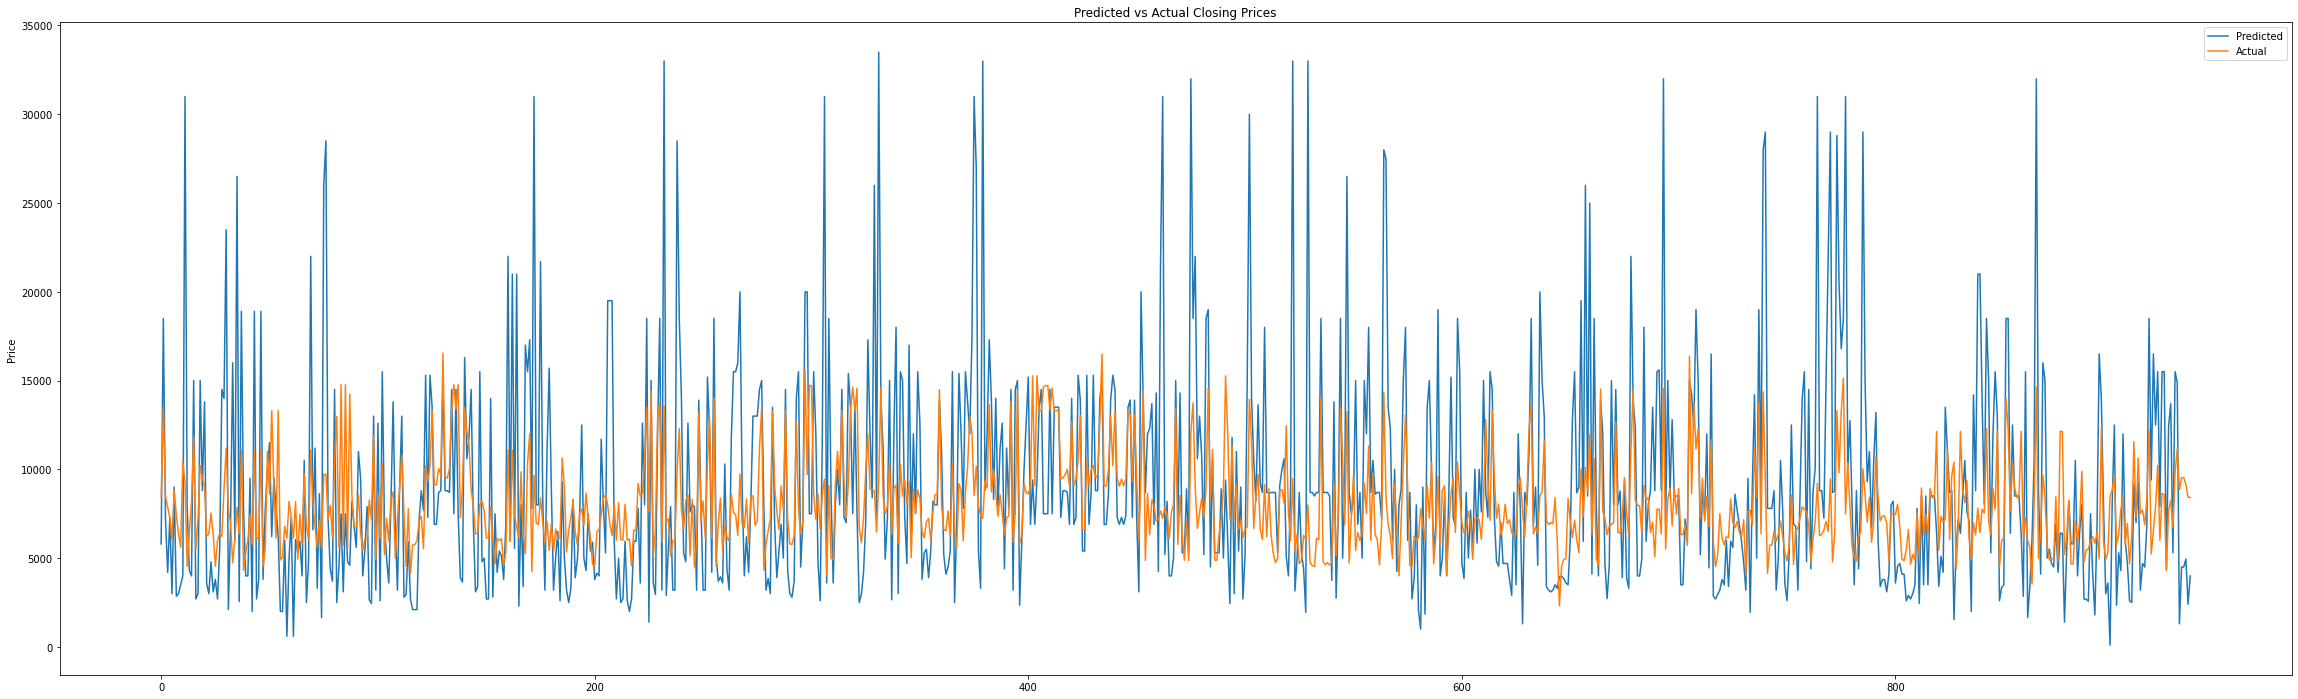

In [132]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Predicted')
plt.plot(y_predict.tolist(), label='Actual')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.22825375263735126


#Train with DNN

In [137]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 6)                 42        
                                                                 
 layer_1 (Dense)             (None, 6)                 42        
                                                                 
 layer_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [138]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
2608/2608 [==============================] - 8s 3ms/step - loss: 79004448.0000 - accuracy: 9.5876e-05 - val_loss: 53702632.0000 - val_accuracy: 1.0785e-04
Epoch 2/30
2608/2608 [==============================] - 7s 3ms/step - loss: 62875932.0000 - accuracy: 9.5876e-05 - val_loss: 52377588.0000 - val_accuracy: 1.0785e-04
Epoch 3/30
2608/2608 [==============================] - 7s 3ms/step - loss: 61923488.0000 - accuracy: 9.5876e-05 - val_loss: 54724760.0000 - val_accuracy: 1.0785e-04
Epoch 4/30
2608/2608 [==============================] - 7s 3ms/step - loss: 61071008.0000 - accuracy: 9.5876e-05 - val_loss: 52640752.0000 - val_accuracy: 1.0785e-04
Epoch 5/30
2608/2608 [==============================] - 7s 3ms/step - loss: 60389056.0000 - accuracy: 9.5876e-05 - val_loss: 53102156.0000 - val_accuracy: 1.0785e-04
Epoch 6/30
2608/2608 [==============================] - 7s 3ms/step - loss: 59812200.0000 - accuracy: 9.5876e-05 - val_loss: 52706748.0000 - val_accuracy: 1.0785e-04
Epoc

In [140]:
test = np.array([75.0,	2.0,	1.0,	1.0,	21.0,	105.0])
print(model.predict(test.reshape(1,6), batch_size=1))

[[7721.7847]]


#Không xử lý ngoại lai chỉ xóa nan


In [188]:
data1 = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
data2 = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
data3 = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]

In [189]:
data1_new = data1[['dien_tich','phong_ngu','so_tang','lat','long','gia']]
data2_new = data2[['dien_tich','phong_ngu','so_tang','lat','long','gia']]
data3_new = data3[['dien_tich','phong_ngu','so_tang','lat','long','gia']]

In [190]:
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã chuyển đổi",df[ten_cot].isna().sum(),"giá trị nan thành:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã xóa giá trị nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

In [191]:
removeNAN(data1_new, 'gia')
for i in data1_new.columns:
  replaceNAN(data1_new, i, 1.0)

Cột ' gia ' đã xóa giá trị nan
Cột ' dien_tich ' đã chuyển đổi 476 giá trị nan thành: 1.0
Cột ' phong_ngu ' đã chuyển đổi 7901 giá trị nan thành: 1.0
Cột ' so_tang ' đã chuyển đổi 29787 giá trị nan thành: 1.0
Cột ' lat ' đã chuyển đổi 36 giá trị nan thành: 1.0
Cột ' long ' đã chuyển đổi 36 giá trị nan thành: 1.0
Cột ' gia ' không có giá trị nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [192]:
removeNAN(data2_new, 'gia')
for i in data2_new.columns:
  replaceNAN(data2_new, i, 1.0)

Cột ' gia ' đã xóa giá trị nan
Cột ' dien_tich ' đã chuyển đổi 103 giá trị nan thành: 1.0
Cột ' phong_ngu ' đã chuyển đổi 21920 giá trị nan thành: 1.0
Cột ' so_tang ' đã chuyển đổi 21715 giá trị nan thành: 1.0
Cột ' lat ' đã chuyển đổi 25 giá trị nan thành: 1.0
Cột ' long ' đã chuyển đổi 25 giá trị nan thành: 1.0
Cột ' gia ' không có giá trị nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [193]:
removeNAN(data3_new, 'gia')
for i in data3_new.columns:
  replaceNAN(data3_new, i, 1.0)

Cột ' gia ' đã xóa giá trị nan
Cột ' dien_tich ' đã chuyển đổi 227 giá trị nan thành: 1.0
Cột ' phong_ngu ' đã chuyển đổi 24589 giá trị nan thành: 1.0
Cột ' so_tang ' đã chuyển đổi 15197 giá trị nan thành: 1.0
Cột ' lat ' đã chuyển đổi 40 giá trị nan thành: 1.0
Cột ' long ' đã chuyển đổi 40 giá trị nan thành: 1.0
Cột ' gia ' không có giá trị nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [194]:
data = pd.concat([data1_new, data2_new, data3_new])

mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

,dien_tich,phong_ngu,so_tang,lat,long,gia
0,75.0,2.0,1.0,21.031035,105.815152,6300
1,115.0,3.0,1.0,21.031130,105.814818,10250
2,100.0,2.0,1.0,21.020889,105.815820,2600
3,30.0,2.0,2.0,21.028785,105.821409,3500
4,72.0,2.0,3.0,21.043654,105.841574,1750
...,...,...,...,...,...,...
113083,80.0,3.0,3.0,21.018166,105.847905,4500
113084,80.0,3.0,3.0,21.018166,105.847905,4500
113085,80.0,3.0,3.0,21.149180,105.758726,4950
113086,70.0,1.0,1.0,21.164764,105.744397,2400


In [195]:
def split(df):
  split = int(len(df) * 0.99)
  train = df[:split]
  test = df[split:]
  print(f"Dữ liệu cho train set: {len(train)}")
  print(f"Dữ liệu cho test set: {len(test)}")
  return train, test

#Lấy data để dạy máy học
train_data, test_data = split(data)

Dữ liệu cho train set: 111957
Dữ liệu cho test set: 1131


In [196]:
names = ['dien_tich','phong_ngu','so_tang','lat','long']
x_train = train_data[names]
y_train = train_data['gia']
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [197]:
x_test = test_data[names]
y_test = test_data['gia']
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [198]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression().fit(x_train, y_train)

In [199]:
y_predict=Linreg.predict(x_test)
y_predict

array([2.56276353e+08, 2.56276353e+08, 2.55617330e+08, ...,
       2.56027736e+08, 2.56535977e+08, 2.56279623e+08])

In [200]:
y_test

0        7400
1        7400
2       15000
3       38900
4        1400
        ...  
1126     4500
1127     4500
1128     4950
1129     2400
1130     4000
Name: gia, Length: 1131, dtype: int64